In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

Matplotlib is building the font cache; this may take a moment.


In [70]:
messages_df = pd.read_csv("../data/british_mps_posts.csv")
messages_df.head()

,handle,date,text
0,amcarmichaelmp.bsky.social,2025-06-20T09:51:13.076Z,Why the government must turn up the heat on en...
1,marshadecordova.bsky.social,2025-06-20T09:50:58.907Z,Happy Awareness Day \n\nI was born with the v...
2,damedianajohnson.bsky.social,2025-06-20T09:45:37.546Z,The summer the country comes together to cheer...
3,libdemcam.bsky.social,2025-06-20T09:42:14.811Z,"I understand, but it isn't my place to tell an..."
4,yasminqureshimp.bsky.social,2025-06-20T09:32:44.331Z,I believe in dignity at the end of life.\n\nBu...


In [72]:
# create proper date columns
messages_df["date"] = pd.to_datetime(messages_df["date"], utc=True, format="mixed", errors="raise")
messages_df["year"] = messages_df["date"].dt.isocalendar().year
messages_df["week"] = messages_df["date"].dt.isocalendar().week
messages_df["simple_date"] = messages_df["date"].dt.date
messages_df['year_week'] = messages_df['year'].astype(str) + '-W' + messages_df['week'].astype(str).str.zfill(2)

# limit the df to messages from 2024 and 2025
messages_df = messages_df[(messages_df["year"] == 2024) | (messages_df["year"] == 2025)]

In [74]:
print(len(set(messages_df["handle"])))
print(len(messages_df))

312
45358


In [66]:
# count the number of tweets per week
group_df = messages_df.groupby("simple_date").size().reset_index(name="count")
group_df.head()

,simple_date,count
0,2024-01-01,4
1,2024-01-02,1
2,2024-01-03,1
3,2024-01-04,4
4,2024-01-05,3


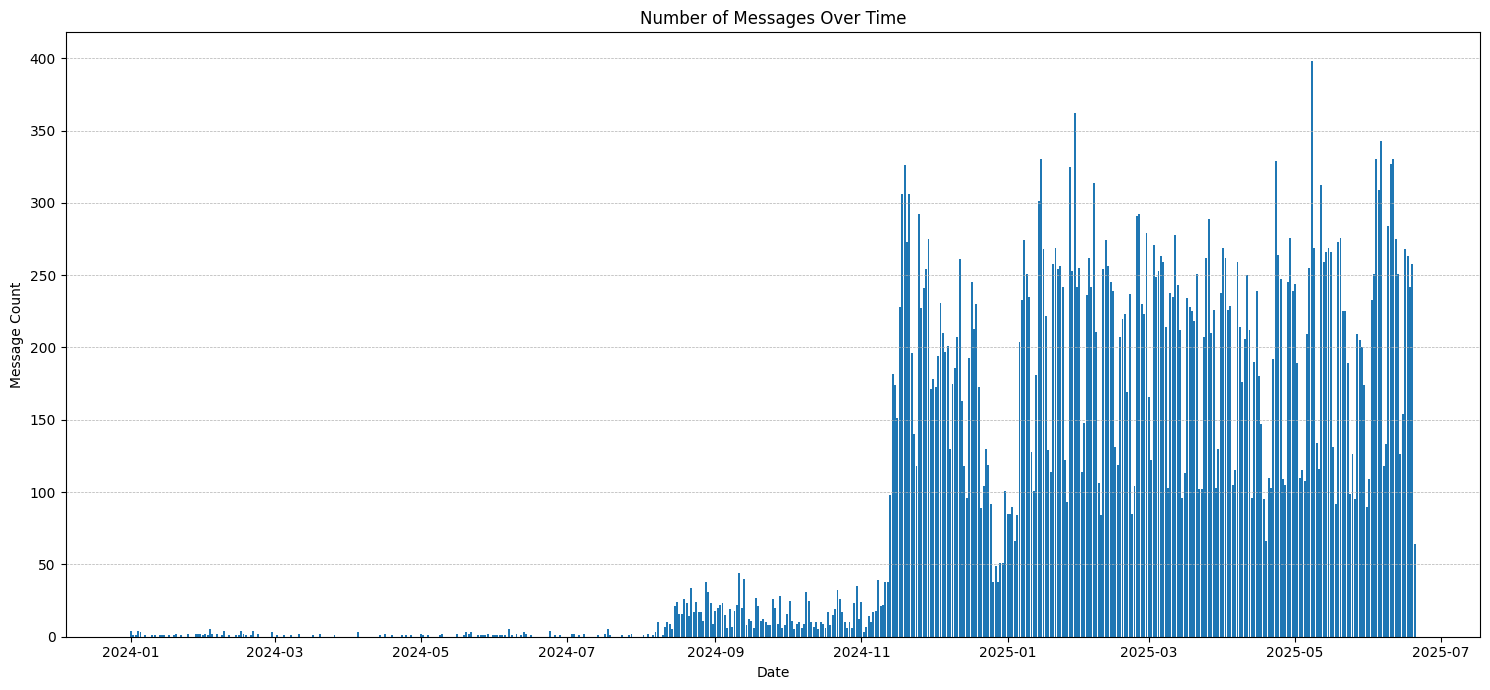

In [69]:
# visualize the number of messages over time
plt.figure(figsize=(15, 7))
plt.bar(group_df["simple_date"], group_df["count"])
plt.title("Number of Messages Over Time")
plt.xlabel("Date")
plt.ylabel("Message Count")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
plt.show()